<a href="https://colab.research.google.com/github/sgroark/genAI/blob/main/assign1prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generative AI: Assignment 1**

**Problem 1 - Extending the Model to Include a Third Category**

In [ ]:
# numerical operations
import numpy as np

# used for plotting
import matplotlib.pyplot as plt

# used for calculating distances
from scipy.spatial import distance

In [ ]:
# Set land points = continent + associated land points
land_points = {
    'South America': [(-30, -60), (-15, -50), (0, -45), (15, -30), (30, -20)],
    'Australia': [(50, 10), (55, 0), (60, 10), (65, 20), (70, 30)],
    'Asia': [(20, 60), (30, 70), (40, 80), (50, 90), (60, 100)],
    'Africa': [(0, 20), (10, 20), (20, 30), (30, 40), (40, 50)],
    'Europe': [(-35, 140), (-30, 145), (-25, 150), (-20, 155), (-15, 160)]
}

# World grid - latitude (-90,90) and longitude (-180,180); step size of 10
grid_points = [(x, y) for x in range(-90, 91, 10) for y in range(-180, 181, 10)]


In [ ]:
# Probability of point being land or sea - based on land points vs total land points
def calculate_prior_probabilities(land_points, total_points):
    P_land = sum(len(points) for points in land_points.values()) / total_points
    P_sea = 1 - P_land

    return P_land, P_sea


# Likelihood of points being land or sea - based on distances to nearest land point
def calculate_likelihoods(grid_points, land_points):
    likelihoods_land = {}
    likelihoods_sea = {}

    all_land_points = [point for points in land_points.values() for point in points]

    for point in grid_points:
        distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()
        likelihoods_land[point] = np.exp(-distances_to_land)  # Exponential decay
        likelihoods_sea[point] = 1 - likelihoods_land[point]

    return likelihoods_land, likelihoods_sea


In [ ]:
# Classifies point as land, sea, or coastline
def classify_point(point, box_bounds):
    x_min, x_max, y_min, y_max = box_bounds

    all_land_points = [point for points in land_points.values() for point in points]

    distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()


    if distances_to_land <= 10:
        return 'Coastline'
    elif x_min <= point[0] <= x_max and y_min <= point[1] <= y_max:
        return 'Land'
    else:
        return 'Sea'

In [ ]:
#@title Plotting the Points and Model

# This functions plots the land points, test points, and the bounding box of
# the land model on a 2D plot.

# Function to plot the points and the model
def plot_points(land_points, test_points, test_classifications, box_bounds):
    fig, ax = plt.subplots()

    # Define colors for each continent
    continent_colors = {
        'South America': 'pink',
        'Europe': 'red',
        'Asia': 'black',
        'Africa': 'purple',
        'Australia': 'orange'
    }

    # Plot land points by continent
    for continent, points in land_points.items():
        land_x, land_y = zip(*points)
        ax.scatter(land_x, land_y, color=continent_colors[continent], label=f'{continent}')

    # Highlight land model with an orange box
    x_min, x_max, y_min, y_max = box_bounds
    land_model_x = [x_min, x_max, x_max, x_min, x_min]
    land_model_y = [y_min, y_min, y_max, y_max, y_min]
    ax.plot(land_model_x, land_model_y, color='orange', label='Land Model')

    # Plot test points: land (green), coastline (yellow), sea (blue)
    for point, classification in zip(test_points, test_classifications):
        color = 'green' if classification == 'Land' else 'yellow' if classification == 'Coastline' else 'blue'
        ax.scatter(point[0], point[1], color=color, edgecolors='black', label=f'Test Point ({classification})')

    # Place the legend outside the plot box
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Land, Sea, and Coastline Points with Model')
    plt.grid(False)
    plt.show()



Test Point Classifications:

Point (40, -100):Sea
Point (20, 50):Coastline
Point (50, 50):Coastline
Point (-40, 50):Land
Point (0, -150):Sea
Point (60, 120):Land
Point (-10, 70):Land
Point (30, -100):Sea
Point (60, 20):Coastline


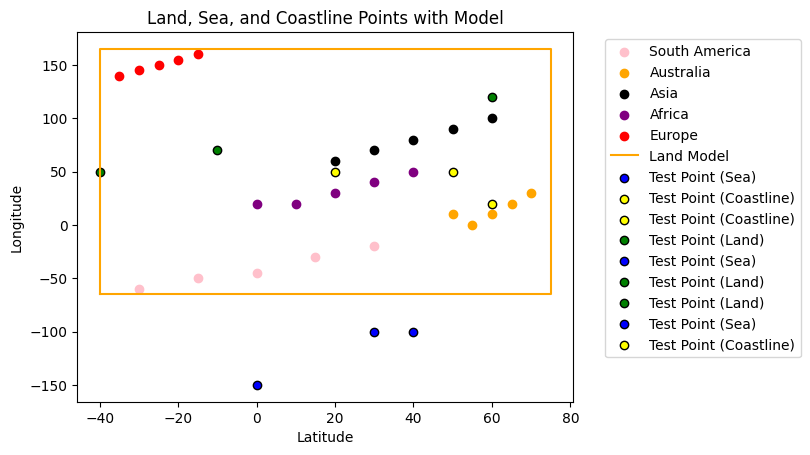

In [ ]:
# MAIN EXECUTION

# total points in the grid

total_points = len(grid_points)

# Probability & Likelihoods
P_land, P_sea = calculate_prior_probabilities(land_points, total_points)
likelihoods_land, likelihoods_sea = calculate_likelihoods(grid_points, land_points)

# Document all x points and y points
all_land_x = [point[0] for points in land_points.values() for point in points]
all_land_y = [point[1] for points in land_points.values() for point in points]

# Establish box bounds
x_min, x_max = min(all_land_x) - 5,max(all_land_x) + 5
y_min, y_max = min(all_land_y) - 5, max(all_land_y) + 5
box_bounds = (x_min, x_max, y_min, y_max)


# Establish set of new test points
test_points = [

    (40,-100),(20,50),(50,50),(-40,50),(0,-150),(60,120), (-10,70), (30,-100), (60,20)

]

# Classify test points in test set
test_classifications = [classify_point(point,box_bounds) for point in test_points]

# Print classification result for test points
print("\nTest Point Classifications:\n")

for point, classification in zip(test_points, test_classifications):
  print(f"Point {point}:{classification}")

# Plot land points, test points, and box model
plot_points(land_points, test_points, test_classifications, box_bounds)

